# Slides for BBQ talk and article
We graph the latest data, the history of the reports, and the changes over time.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from matplotlib import pyplot as plt

import utilities as u

plt.rcParams['axes.grid'] = True
plt.rcParams['axes.grid.which'] = "both"
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['ytick.minor.visible'] = True
# plt.rcParams['figure.autolayout'] = True

# This doesn't work - it gets overridden somewhere.  Needs to be for each plot. :(
# plt.rc('font', size=40)
# plt.rcParams['font.size'] = 40

def pltdflt(figsize=(12, 10)):
    fig, ax = plt.subplots(figsize=figsize)
    plt.grid(True, which="minor", linestyle="--")
    plt.grid(True, which="major", color="0.5")
    plt.rc('font', size=15)

    return fig, ax

In [3]:
dat = pd.read_csv("../trends/data-by-day.csv")
dat.rename(columns={"CASE_COUNT": "NEW_COVID_CASE_COUNT",
                   "date_of_interest" :"DATE_OF_INTEREST"},
           inplace=True)
dat["DATE_OF_INTEREST"] = pd.to_datetime(dat["DATE_OF_INTEREST"])
dat = dat.set_index("DATE_OF_INTEREST")

In [4]:
dat.head()

,NEW_COVID_CASE_COUNT,PROBABLE_CASE_COUNT,HOSPITALIZED_COUNT,DEATH_COUNT,PROBABLE_DEATH_COUNT,CASE_COUNT_7DAY_AVG,ALL_CASE_COUNT_7DAY_AVG,HOSP_COUNT_7DAY_AVG,DEATH_COUNT_7DAY_AVG,ALL_DEATH_COUNT_7DAY_AVG,...,SI_HOSPITALIZED_COUNT,SI_DEATH_COUNT,SI_PROBABLE_DEATH_COUNT,SI_CASE_COUNT_7DAY_AVG,SI_PROBABLE_CASE_COUNT_7DAY_AVG,SI_ALL_CASE_COUNT_7DAY_AVG,SI_HOSPITALIZED_COUNT_7DAY_AVG,SI_DEATH_COUNT_7DAY_AVG,SI_ALL_DEATH_COUNT_7DAY_AVG,INCOMPLETE
DATE_OF_INTEREST,,,,,,,,,,,,,,,,,,,,,
2020-02-29,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-03-01,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-03-02,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-03-03,1,0,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-03-04,5,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Latest report
We generate a bar chart of the new cases/day.  Since there's weekly cyclicity, we also graph the 7 day rolling average.  The latter allows one to better see trends.  But the analysis is hampered by reporting delays - many sites don't promptly report the data.

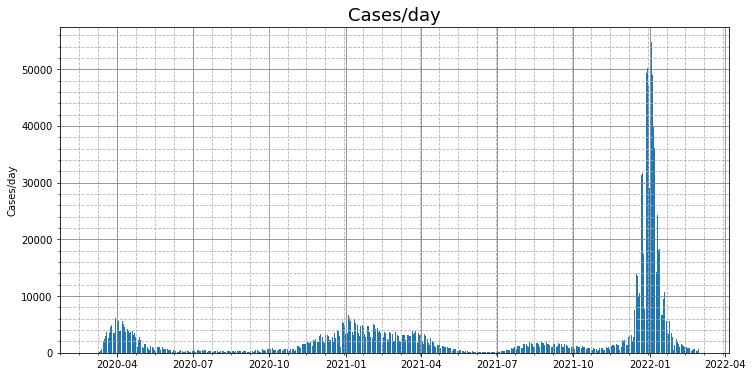

In [5]:
fig, ax = pltdflt(figsize=(12,6))
ax.bar(dat.index, dat["NEW_COVID_CASE_COUNT"])
# plt.grid(False, which="minor")
plt.ylabel("Cases/day")
plt.title("Cases/day")
plt.savefig("whatTheyTellYou.png")

# Raw, noisy data

In [6]:
hdat = pd.read_csv("../history.csv")
hdat["DATE_OF_INTEREST"] = pd.to_datetime(hdat["DATE_OF_INTEREST"])
hdat["AS_OF"] = pd.to_datetime(hdat["AS_OF"])

In [7]:
hdat.head()

,DATE_OF_INTEREST,AS_OF,"Cases/day, 7 day avg",DEATH_COUNT,"Deaths/day, 7 day avg",HOSPITALIZED_CASE_COUNT,"Hospitalized/day, 7 day avg",NEW_COVID_CASE_COUNT
0,2020-03-13,2020-03-26 11:26:41,603.000000,1.0,1.000000,123.0,123.000000,603.0
1,2020-03-14,2020-03-26 11:26:41,602.000000,2.0,1.500000,160.0,141.500000,601.0
2,2020-03-15,2020-03-26 11:26:41,726.333333,5.0,2.666667,193.0,158.666667,975.0
3,2020-03-16,2020-03-26 11:26:41,1023.000000,9.0,4.250000,290.0,191.500000,1913.0
4,2020-03-17,2020-03-26 11:26:41,1251.000000,7.0,4.800000,315.0,216.200000,2163.0


In [8]:
dp = hdat.pivot_table(index="DATE_OF_INTEREST",
                      columns="AS_OF",
                      values="NEW_COVID_CASE_COUNT")

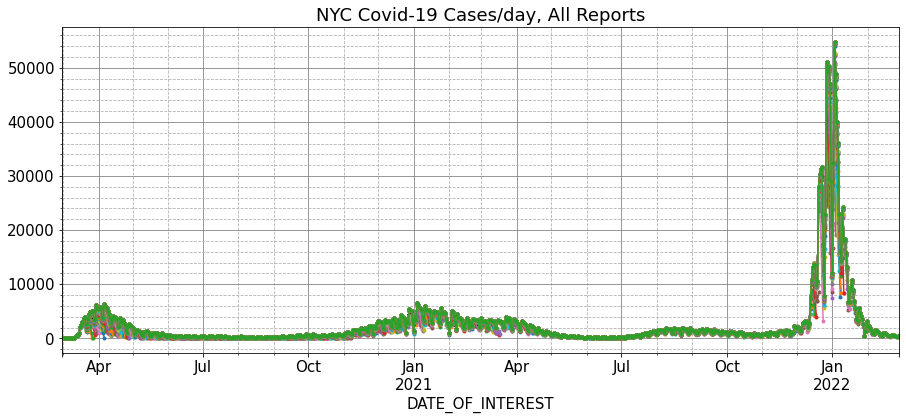

In [9]:
fig, ax = pltdflt((15,6))
dp.plot(style=".-", ax=ax, legend=None)

#ax.legend(loc="upper left")
plt.title("NYC Covid-19 Cases/day, All Reports")
plt.savefig("theFullStory.png", bbox_inches="tight")

In [10]:
#wavelist = [1, 2, 3, 4]
wavelist = []
for wave in wavelist:
    start, end = u.get_wave(wave)
    name = u.get_wave_name(wave)
    if name is None:
        name = f"Wave {wave}"

    period = dp[(dp.index >= start) & (dp.index < end)]

    fig, ax = pltdflt((15,6))
    period.plot(style=".-", ax=ax, legend=None)

    #ax.legend(loc="upper left")
    plt.title(f"NYC Covid-19 Cases/day, All Reports, {name}")
    plt.savefig(f"Wave{wave}.png", bbox_inches="tight")
    plt.show()

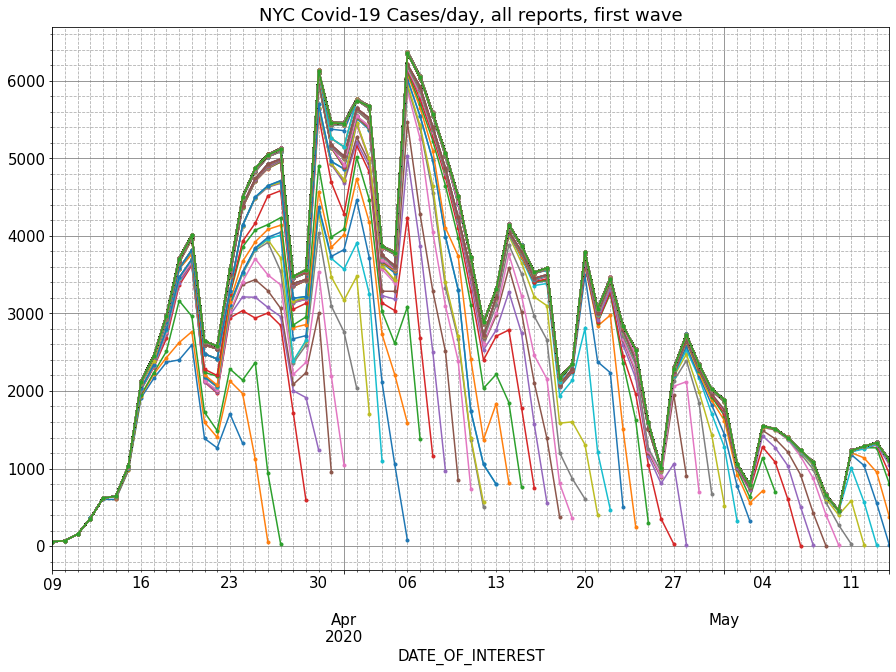

In [11]:
start, end = u.get_wave(1, True)

period = dp[(dp.index >= start) & (dp.index < end)]

fig, ax = pltdflt((15,10))
period.plot(style=".-", ax=ax, legend=None)

#ax.legend(loc="upper left")
plt.title(f"NYC Covid-19 Cases/day, all reports, first wave")
plt.savefig(f"Wave1Peak.png", bbox_inches="tight")
plt.show()

# Individual reports

In [12]:
dp = hdat.pivot_table(index="DATE_OF_INTEREST",
                      columns="AS_OF",
                      values="NEW_COVID_CASE_COUNT")

In [13]:
rptdates = sorted(hdat["AS_OF"].unique())

casesPerDay2020-03-26T11_26_41.000000000.png


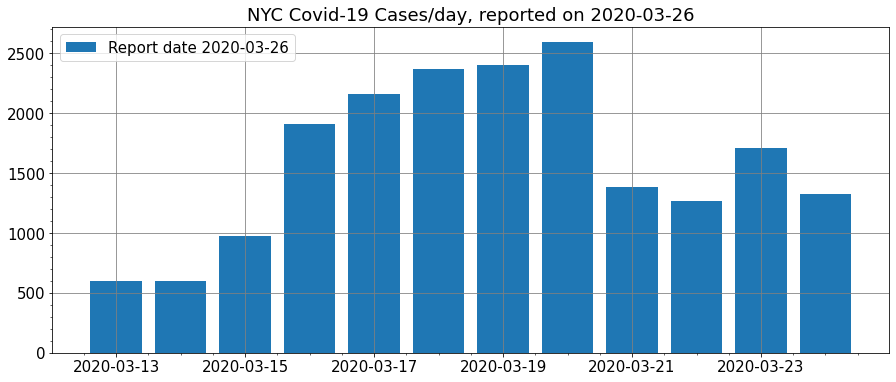

casesPerDay2020-03-27T10_03_51.000000000.png


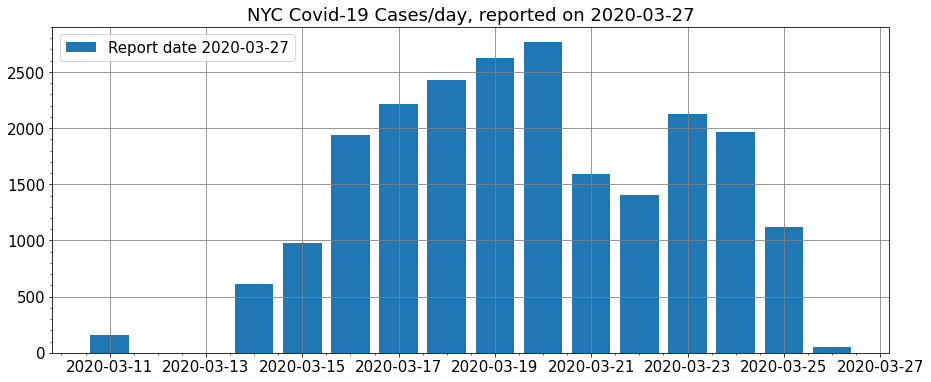

casesPerDay2020-03-27T18_37_24.000000000.png


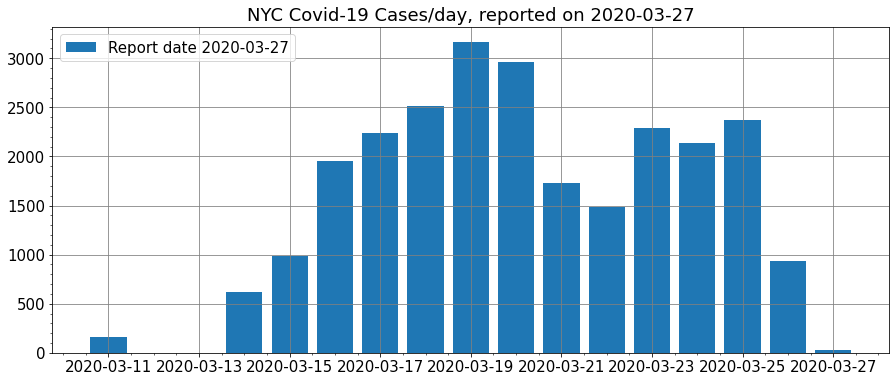

casesPerDay2020-03-31T09_25_56.000000000.png


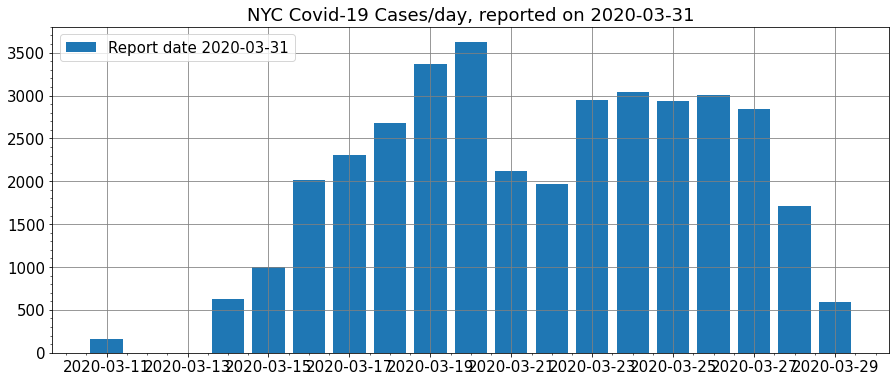

casesPerDay2020-03-31T17_21_32.000000000.png


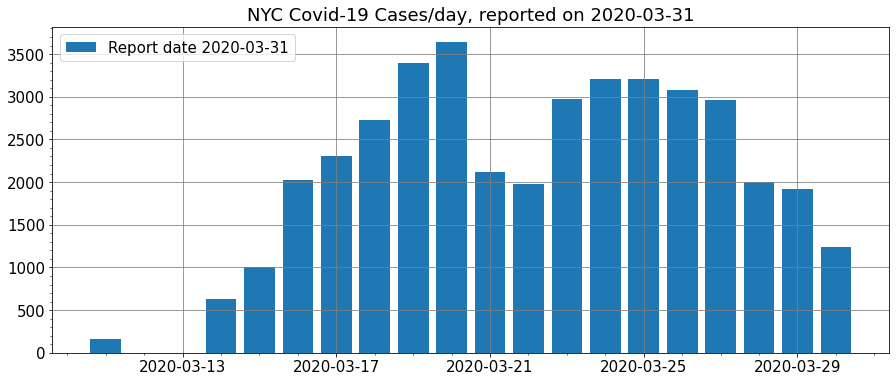

casesPerDay2020-04-01T17_31_00.000000000.png


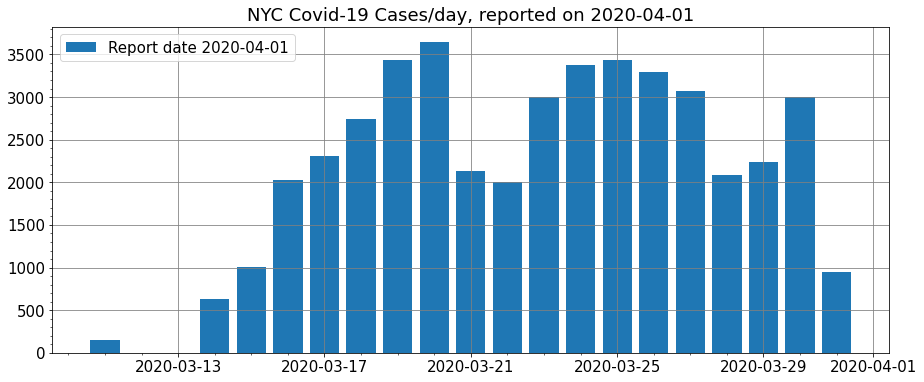

casesPerDay2020-04-02T18_09_06.000000000.png


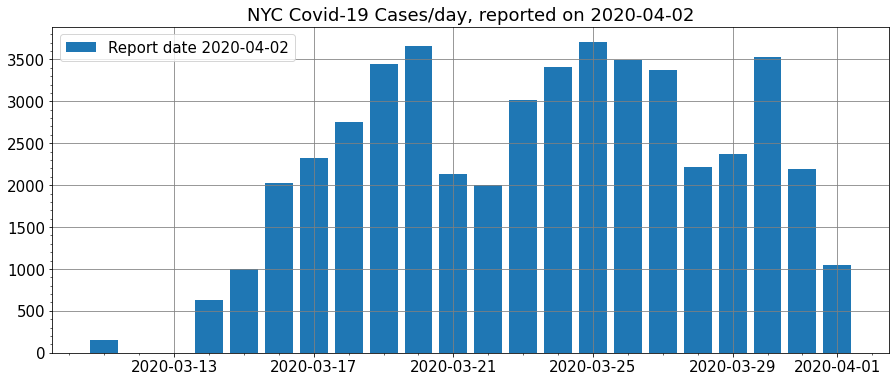

casesPerDay2020-04-03T18_15_27.000000000.png


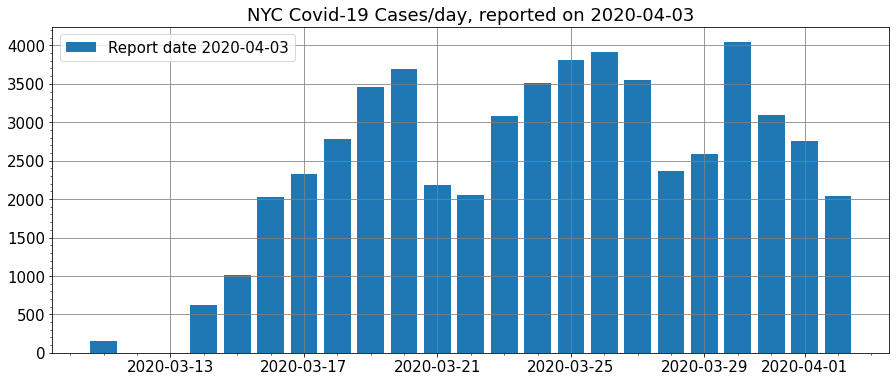

casesPerDay2020-04-04T18_32_26.000000000.png


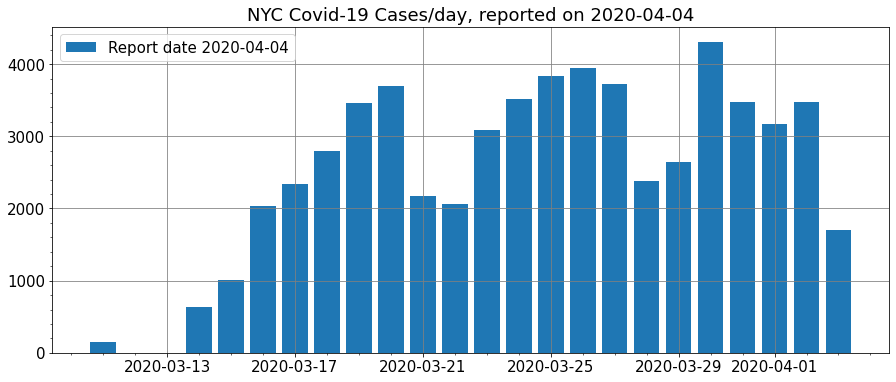

casesPerDay2020-04-05T17_30_00.000000000.png


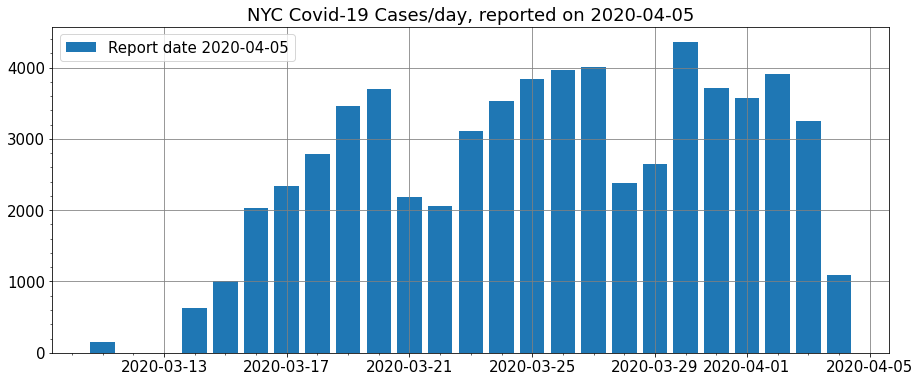

casesPerDay2020-04-06T18_05_54.000000000.png


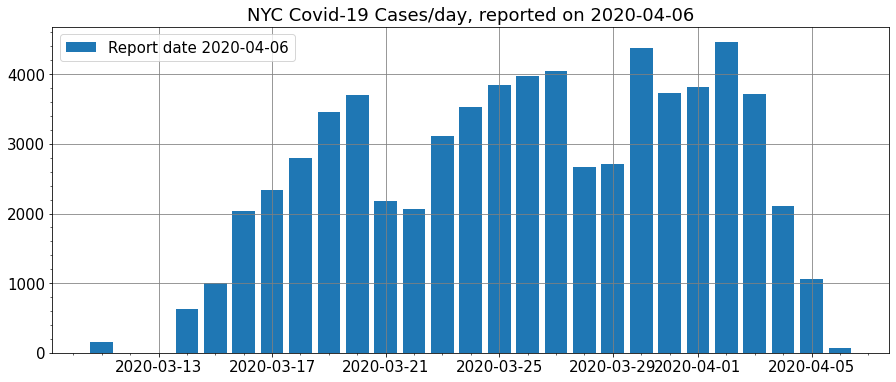

casesPerDay2020-04-07T17_52_37.000000000.png


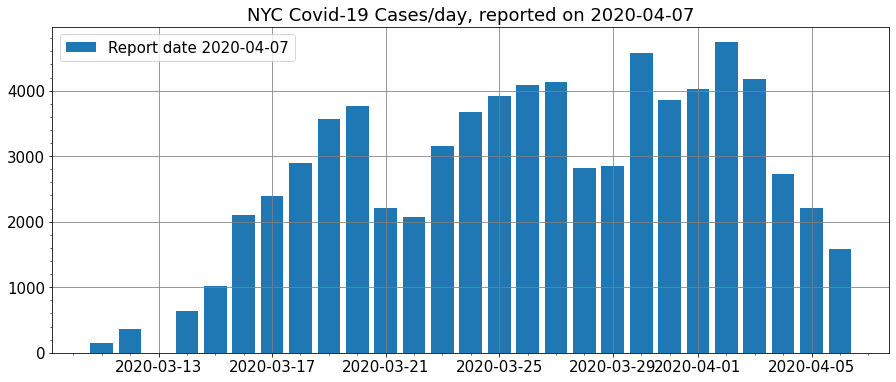

casesPerDay2020-04-08T18_03_33.000000000.png


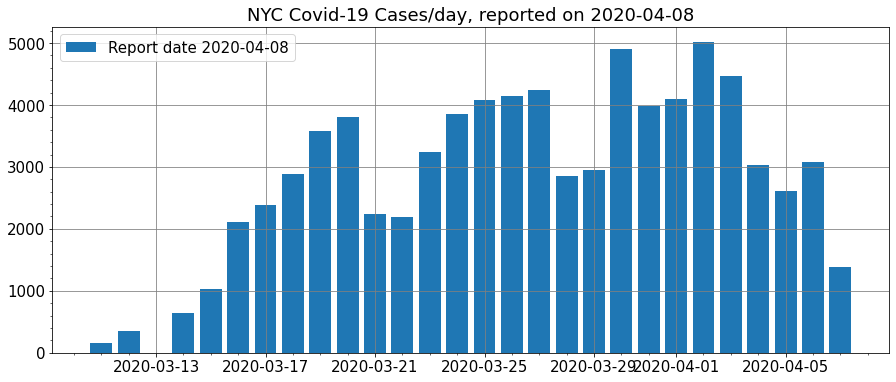

casesPerDay2020-04-09T17_31_46.000000000.png


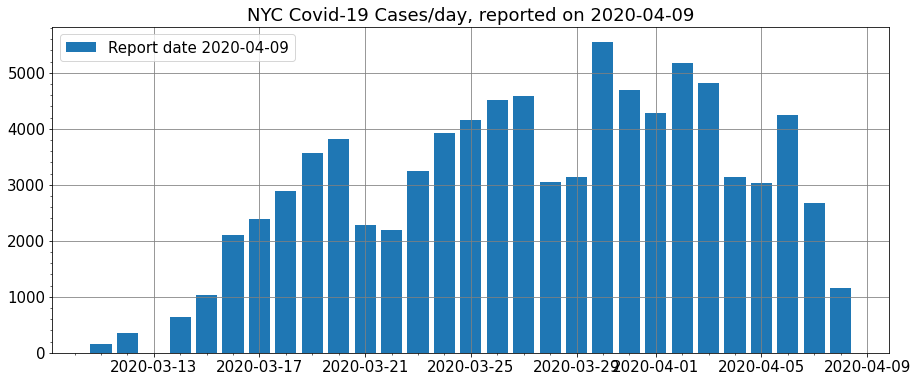

casesPerDay2020-04-10T17_41_39.000000000.png


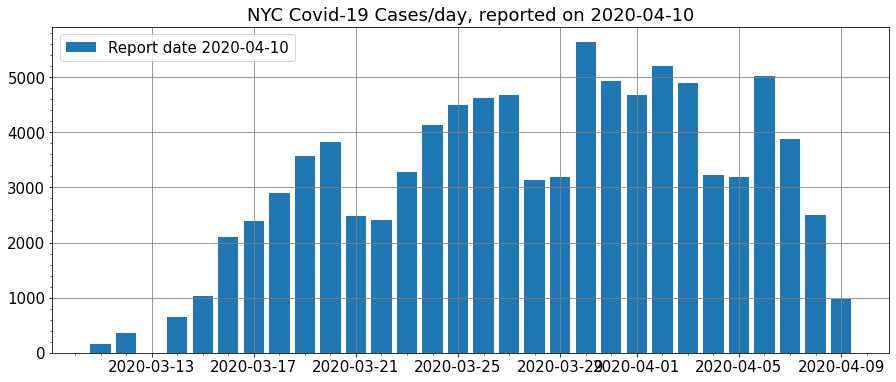

casesPerDay2020-04-11T17_36_46.000000000.png


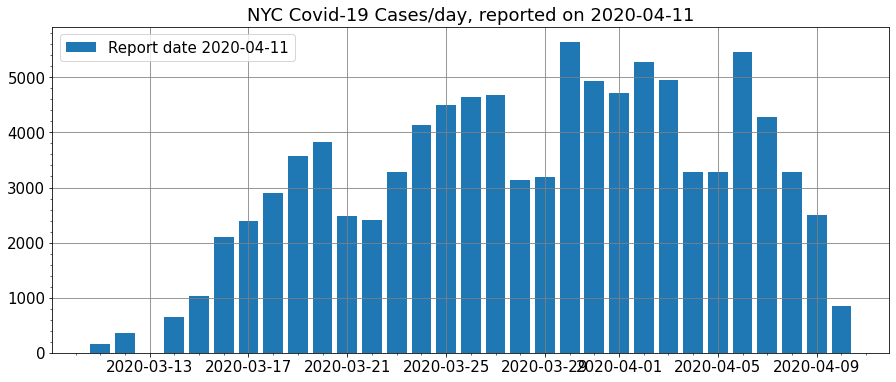

In [14]:
for dateidx in range(16):
    dt = rptdates[dateidx]
    date = pd.to_datetime(dt).date()
    fn = f"casesPerDay{dt}.png".replace(":", "_")
    print(fn)
    
    fig, ax = pltdflt((15,6))
    
    dat = dp[[dt]].dropna()
    dat = dat[dat.index >= "2020/03/01"]
    
    ax.bar(dat.index, dat[dt])
    plt.grid(False, which="minor")
    ax.legend([f"Report date {date}"], loc="upper left")
    plt.title(f"NYC Covid-19 Cases/day, reported on {date}")
    plt.savefig(fn, bbox_inches="tight")
    plt.show()

# Smoothed reports

In [15]:
dps = hdat.pivot_table(index="DATE_OF_INTEREST",
                       columns="AS_OF",
                       values="Cases/day, 7 day avg")

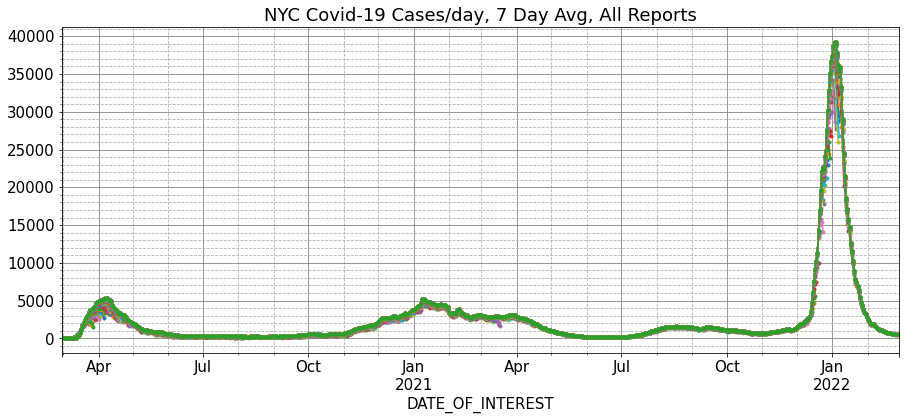

In [16]:
fig, ax = pltdflt((15, 6))
dps.plot(style=".-", ax=ax, legend=None)
# ax.legend(loc="upper left")
plt.title("NYC Covid-19 Cases/day, 7 Day Avg, All Reports")
plt.savefig("fullNYCSmoothed.png", bbox_inches="tight")

In [17]:
#wavelist = [1, 2, 3, 4]
wavelist = []
for wave in wavelist:
    start, end = u.get_wave(wave)
    name = u.get_wave_name(wave)
    if name is None:
        name = f"Wave {wave}"

    period = dps[(dps.index >= start) & (dps.index < end)]

    fig, ax = pltdflt((15,6))
    period.plot(style=".-", ax=ax, legend=None)

    #ax.legend(loc="upper left")
    plt.title(f"NYC Covid-19 Cases/day, All Reports, {name}")
    plt.savefig(f"Wave{wave}Smoothed.png", bbox_inches="tight")
    plt.show()

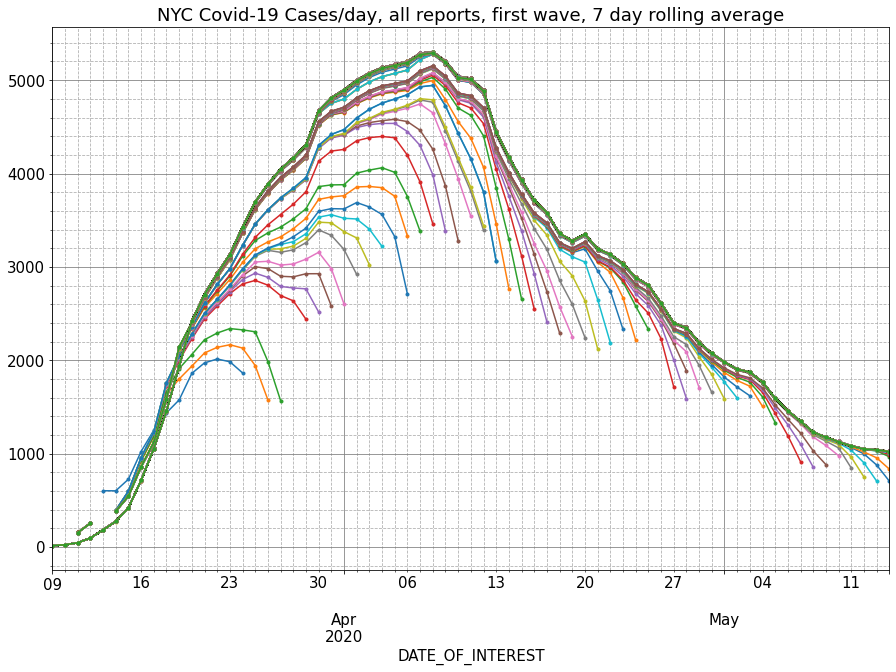

In [18]:
start, end = u.get_wave(1, True)

period = dps[(dps.index >= start) & (dps.index < end)]

fig, ax = pltdflt((15,10))
period.plot(style=".-", ax=ax, legend=None)

#ax.legend(loc="upper left")
plt.title(f"NYC Covid-19 Cases/day, all reports, first wave, 7 day rolling average")
plt.savefig(f"Wave1SmoothedPeak.png", bbox_inches="tight")
plt.show()

# Copy over slides from OWID repo

In [19]:
from shutil import copy2
owidDir = "../../covid-19-data/scripts/notebooks/"
copy2(owidDir + "casesPerDayLatestRawNoLegend.png", "USACasesPerDayLatestRawNoLegend.png")
copy2(owidDir + "casesPerDayHistoryRawNoLegend.png", "USACasesPerDayHistoryRawNoLegend.png")
copy2(owidDir + "casesPerDayLatestNoLegend.png", "USACasesPerDayLatestNoLegend.png")


'USACasesPerDayLatestNoLegend.png'